In [40]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import googlemaps

In [41]:
df=pd.read_csv('../data/nyc_dept_fin.csv')

## EDA NYC Department of Finance Housing Data

In [42]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,price_per_sqft
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43.0,S1,743 EAST 6TH STREET,NaN,10009.0,...,1.0,2.0,2090.0,3680.0,1940.0,1,S1,3200000.0,7/24/19,869.565217
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61.0,A4,189 EAST 7TH STREET,NaN,10009.0,...,0.0,1.0,987.0,2183.0,1860.0,1,A4,0.0,9/25/19,0.000000
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1.0,B9,166 AVENUE A,NaN,10009.0,...,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0.0,7/22/19,0.000000
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56.0,C0,263 EAST 7TH STREET,NaN,10009.0,...,0.0,3.0,2430.0,3600.0,1899.0,1,C0,6300000.0,4/30/19,1750.000000
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9.0,C0,604 EAST 11TH STREET,NaN,10009.0,...,0.0,3.0,2375.0,5110.0,1939.0,1,C0,0.0,10/24/19,0.000000


In [43]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'sale_date',
       'price_per_sqft'],
      dtype='object')

In [44]:
df.shape

(79071, 21)

In [45]:
df.isnull().mean().sort_values(ascending=False)

apartment_number                  0.775796
price_per_sqft                    0.260500
land_square_feet                  0.199656
commercial_units                  0.199656
total_units                       0.199656
residential_units                 0.199656
gross_square_feet                 0.199643
year_built                        0.072353
building_class_at_present         0.003870
tax_class_at_present              0.003870
zip_code                          0.000177
tax_class_at_time_of_sale         0.000000
building_class_at_time_of_sale    0.000000
sale_date                         0.000000
sale_price                        0.000000
address                           0.000000
lot                               0.000000
block                             0.000000
building_class_category           0.000000
neighborhood                      0.000000
borough                           0.000000
dtype: float64

In [46]:
df.dropna(subset = ['zip_code'], inplace=True)

In [47]:
df.drop(columns = ['apartment_number','price_per_sqft','land_square_feet',
                    'commercial_units','total_units','residential_units','gross_square_feet',
                    'building_class_at_present','tax_class_at_present'], axis=1,inplace=True)

In [48]:
list_of_col_to_int = [ 'block', 'zip_code', 'year_built', 'tax_class_at_time_of_sale']
def col_convert_float_to_int(col_list, df):
    for i in col_list:
        df[i] = df[i].astype('Int64')
    return df

In [49]:
df = col_convert_float_to_int(list_of_col_to_int, df)

## Removing outliers (outside of nyc)

### We are going to read in a text file of zip_codes separated by borough 

In [50]:
text_file = open('../data/zipcodes.txt','r')

In [51]:
lines = text_file.read()


In [52]:
##get individual sets of zipcodes using split on new line. 
bronx=ast.literal_eval(lines.split('\n')[0])
brooklyn=ast.literal_eval(lines.split('\n')[1])
manhattan=ast.literal_eval(lines.split('\n')[2])
queen=ast.literal_eval(lines.split('\n')[3])
staten_island=ast.literal_eval(lines.split('\n')[4])


In [53]:
nyc=bronx+brooklyn+manhattan+queen+staten_island

In [54]:
## if zip_code is in list of respective zip code set, these columns return True
df['nyc']=[i in nyc for i in df['zip_code']]
df['manhattan']=[i in manhattan for i in df['zip_code']]
df['brooklyn']=[i in brooklyn for i in df['zip_code']]
df['staten_island']=[i in staten_island for i in df['zip_code']]
df['bronx']=[i in bronx for i in df['zip_code']]
df['queens']=[i in queen for i in df['zip_code']]

In [55]:
df=df[df['nyc']==True]

In [56]:
df['borough']=None


In [57]:
##assign borough based on boolean values
df['borough']=np.where(df['manhattan']==True, 'manhattan', 
         (np.where(df['bronx']==True, 'bronx', 
         (np.where(df['queens']==True, 'queens',
         (np.where(df['brooklyn']==True, 'brooklyn',
                   'staten_island')))))))
        

## Visualization approach by borough

In [58]:
def bar_bcc(borough,category):
    values = df[df[borough]==True][category].value_counts().head(12).keys().tolist()
    counts = df[df[borough]==True][category].value_counts().head(12).tolist()
    values1=[]

    plt.bar(values,counts,color='red',alpha=0.5)
    plt.xticks(rotation=90)
    plt.title(f'{category} overall frequencies')

        

In [59]:
def borough_comparison(category,n):
    nyc=['manhattan','queens','brooklyn','bronx','staten_island']

    data={}
    for i in df[category].value_counts().head(n).keys().tolist():
        data.update({i:[]})
        for j in nyc:
        
            data[i].append(df[(df['borough']==j)&(df[category]==i)][category].count())
    df7=pd.DataFrame(data,index=nyc)
    df7.plot.bar(rot=0,figsize=(12,4),title=f'{category} frequencies by borough')
   
    
  

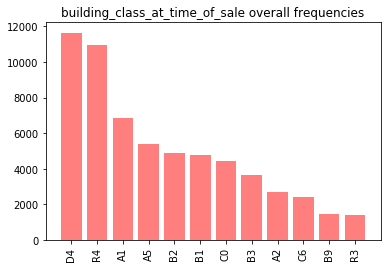

In [60]:
bar_bcc('nyc','building_class_at_time_of_sale')

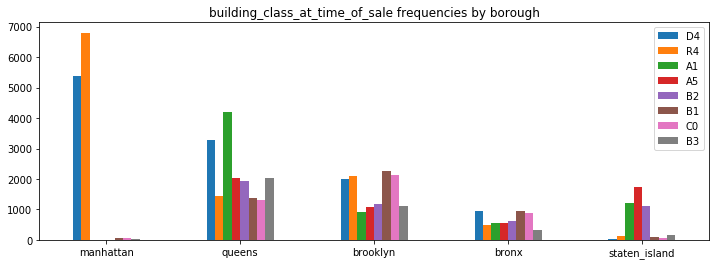

In [61]:
borough_comparison('building_class_at_time_of_sale',8)

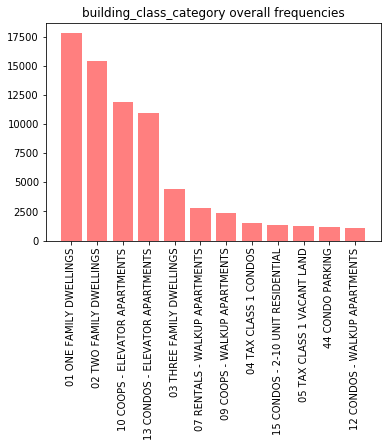

In [62]:
bar_bcc('nyc','building_class_category')

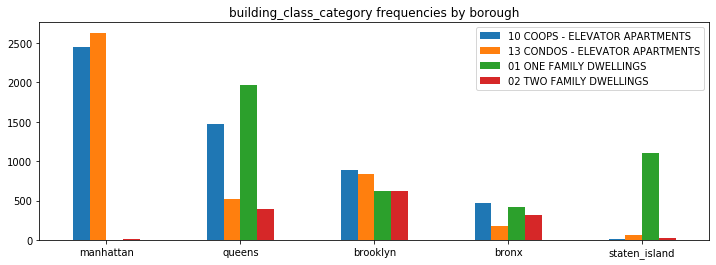

In [217]:
borough_comparison('building_class_category',8)

In [199]:
print('Manhattan')
print(df[df['manhattan']==True]['building_class_at_time_of_sale'].value_counts().head())
print('\nQueens')
print(df[df['queens']==True]['building_class_at_time_of_sale'].value_counts().head())
print('\nBrooklyn')
print(df[df['brooklyn']==True]['building_class_at_time_of_sale'].value_counts().head())
print('\nBrooklyn')
print(df[df['brooklyn']==True]['building_class_at_time_of_sale'].value_counts().head())
print('\nStaten Island')
print(df[df['staten_island']==True]['building_class_at_time_of_sale'].value_counts().head())

Manhattan
R4    6798
D4    5372
R9     847
C6     723
R1     246
Name: building_class_at_time_of_sale, dtype: int64

Queens
A1    4198
D4    3287
A5    2039
B3    2029
B2    1925
Name: building_class_at_time_of_sale, dtype: int64

Brooklyn
B1    2270
C0    2135
R4    2099
D4    2006
B2    1193
Name: building_class_at_time_of_sale, dtype: int64

Brooklyn
B1    2270
C0    2135
R4    2099
D4    2006
B2    1193
Name: building_class_at_time_of_sale, dtype: int64

Staten Island
A5    1729
A1    1215
B2    1103
A2     851
V0     463
Name: building_class_at_time_of_sale, dtype: int64


In [200]:
df=df[(df['nyc']==True)&
   ((df['building_class_at_time_of_sale']=='B1')|(df['building_class_at_time_of_sale']=='R4')|
   (df['building_class_at_time_of_sale']=='D4')|(df['building_class_at_time_of_sale']=='A1')|
   (df['building_class_at_time_of_sale']=='A5'))]

In [201]:
df.shape

(39602, 18)

In [202]:
df['sale_price'].quantile(.32)

225000.0

In [203]:
df.groupby('sale_price')['sale_price'].count().sort_values(ascending=False)

sale_price
0.0          10046
10.0           346
550000.0       228
650000.0       204
600000.0       197
             ...  
1369830.0        1
1370800.0        1
1372410.0        1
1372500.0        1
892307.0         1
Name: sale_price, Length: 6019, dtype: int64

In [204]:
df.drop(df[df['sale_price']<12000].index, axis = 0, inplace=True)

In [205]:
df.shape

(29022, 18)

(array([1834., 5187., 6334., 4728., 3193., 1363., 1173.,  890.,  672.,
         461.,  377.,  310.,  324.,  232.,  189.,  125.,  130.,  116.,
          95.,  128.]),
 array([  12000.,  212650.,  413300.,  613950.,  814600., 1015250.,
        1215900., 1416550., 1617200., 1817850., 2018500., 2219150.,
        2419800., 2620450., 2821100., 3021750., 3222400., 3423050.,
        3623700., 3824350., 4025000.]),
 <a list of 20 Patch objects>)

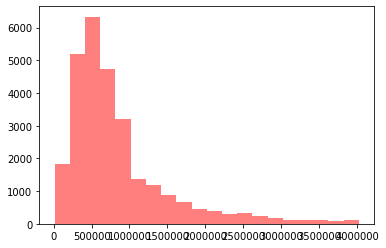

In [206]:
plt.hist(df[df['sale_price']<df['sale_price'].quantile(.96)]['sale_price'],bins=20,color='red',alpha=0.5)

(array([1.600e+01, 4.800e+01, 5.200e+01, 9.600e+01, 3.890e+02, 1.704e+03,
        3.865e+03, 7.772e+03, 7.412e+03, 3.623e+03, 2.053e+03, 1.029e+03,
        5.370e+02, 1.940e+02, 1.000e+02, 9.100e+01, 2.900e+01, 9.000e+00,
        1.000e+00, 2.000e+00]),
 array([ 9.39266193,  9.8878276 , 10.38299327, 10.87815895, 11.37332462,
        11.86849029, 12.36365596, 12.85882164, 13.35398731, 13.84915298,
        14.34431865, 14.83948433, 15.33465   , 15.82981567, 16.32498134,
        16.82014702, 17.31531269, 17.81047836, 18.30564403, 18.80080971,
        19.29597538]),
 <a list of 20 Patch objects>)

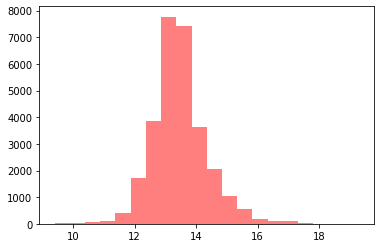

In [207]:
plt.hist(np.log(df['sale_price']),bins=20,color='red',alpha=0.5)

In [208]:
#df.to_csv('../data/outpu2.csv')

In [209]:
df.shape

(29022, 18)

In [210]:
df=df.sample(15000,random_state=1881)

In [211]:
df.shape

(15000, 18)

In [212]:
df.to_csv('../data/nyc_dept_forGeo.csv') 